<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from utilities import pmfplot

## 10.5 Poisson Distribution

### Plot the discrete distribution 

[Text(0.5, 0, 'random variable $X$'), Text(0, 0.5, 'CDF $F(x)$'), (-0.02, 1.1)]

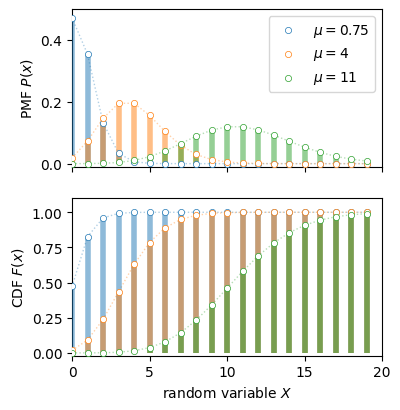

In [12]:
xlim = (0, 20)
ylim = (-0.01, 0.5)

kws = [
    {'mu': 0.75, 'k': 0.5, 'color': 'C0', 'ls': '-'},
    {'mu': 4, 'k': 0.5, 'color': 'C1', 'ls': '-'},
    {'mu': 11, 'k': 0.8, 'color': 'C2', 'ls': '-'},
]
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))

x = np.arange(0, 20)
for d in kws:
    mu, k = d['mu'], d['k']
    #x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu)+1 )   
    pmfplot(ax[0], x, stats.poisson.pmf(x, mu), c=d['color'], label=r'$\mu={}$'.format(mu))
    pmfplot(ax[1], x, stats.poisson.cdf(x, mu), c=d['color'])
    
    ax[0].plot(x, stats.poisson.pmf(x, mu), c=d['color'], lw=1, ls=':', alpha=0.35)
    ax[1].plot(x, stats.poisson.cdf(x, mu), c=d['color'], lw=1, ls=':', alpha=0.35)
    
ax[0].legend()
ax[0].set(xlabel=r"", ylabel=r"PMF $P(x)$",     ylim=ylim, xlim=xlim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(x)$",  ylim=[-0.02, 1.1])   

### Draw samples from the Poisson Distribution

In [13]:
rng = np.random.default_rng()

n_samples = 100
mu = 4
sample = rng.poisson(mu, n_samples)
sample

array([ 3,  7,  3,  2,  5,  3,  5,  6,  3,  5,  1,  4,  6,  3,  6,  7,  5,
        5,  3,  6,  4,  4,  5,  3,  2,  9,  6,  5,  2,  6,  6,  2,  4,  7,
        3,  4,  5,  0,  5,  3,  5,  6,  2,  3,  3,  7,  5,  3,  5,  2,  0,
        5,  2,  8,  2,  2,  6, 10,  8,  3,  5,  2,  3,  3,  8,  2,  3,  9,
        9,  3,  4,  6,  3,  4,  4,  2,  1,  1,  2,  7,  2,  4,  3,  2,  5,
        6,  2,  6,  8,  3,  3,  3,  8,  4,  2,  2,  2,  5,  3,  3])

Now show the distribution of these samples -- they roughly approximate the "true" distribution of the population shown above:

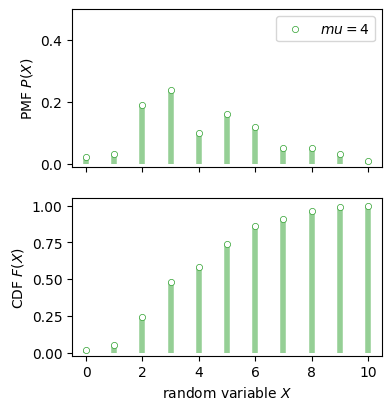

In [17]:
# Counting of events is done as for the Bernoulli distribution:
values = np.unique(sample)
counts = np.array([np.sum(sample == s) for s in values])
pmf = counts / counts.sum()
pdf = np.cumsum(pmf)



fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))
pmfplot(ax[0], values, pmf, c='C2', label=r'$mu={}$'.format(mu))
pmfplot(ax[1], values, pdf, c='C2')
ax[0].set(xlabel=r"", ylabel=r"PMF $P(X)$", ylim=ylim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(X)$", ylim=[-0.02, 1.05])    
ax[0].legend()